In [1]:
import os
import shutil
import keras
import numpy as np 
from glob import glob 
from tqdm import tqdm

from keras.preprocessing.image import ImageDataGenerator 
import seaborn as sns  
import matplotlib.pyplot as plt 

from keras import Sequential

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from keras.callbacks import ModelCheckpoint, EarlyStopping


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_path = '/kaggle/input/mepco-tropic-leaf/MepcoTropicLeaf-V1/Database'
class_names = sorted(os.listdir(data_path))
num_classes = len(class_names)
print("Class Names: \n", class_names)
print("Number of Classes:", num_classes)

Class Names: 
 ['Asthma Plant.zip', 'Avaram.zip', 'Balloon vine.zip', 'Bellyache bush (Green).zip', 'Benghal dayflower.zip', 'Big Caltrops.zip', 'Black-Honey Shrub.zip', 'Bristly Wild Grape.zip', 'Butterfly Pea.zip', 'Cape Gooseberry.zip', 'Common Wireweed.zip', 'Country Mallow.zip', 'Crown flower.zip', 'Green Chireta.zip', 'Holy Basil.zip', 'Indian CopperLeaf.zip', 'Indian Jujube.zip', 'Indian Sarsaparilla.zip', 'Indian Stinging Nettle.zip', 'Indian Thornapple.zip', 'Indian wormwood.zip', 'Ivy Gourd.zip', 'Kokilaksha.zip', 'Land Caltrops (Bindii).zip', 'Madagascar Periwinkle.zip', 'Madras Pea Pumpkin.zip', 'Malabar Catmint.zip', 'Mexican Mint.zip', 'Mexican Prickly Poppy.zip', 'Mountain Knotgrass.zip', 'Nalta Jute.zip', 'Night blooming Cereus.zip', 'Panicled Foldwing.zip', 'Prickly Chaff Flower.zip', 'Punarnava.zip', 'Purple Fruited Pea Eggplant.zip', 'Purple Tephrosia.zip', 'Rosary Pea.zip', 'Shaggy button weed.zip', 'Small Water Clover.zip', 'Spiderwisp.zip', 'Square Stalked Vine.zi

In [3]:
class_sizes = []
for name in class_names:
    class_size = len(os.listdir(data_path + "/" + name))
    class_sizes.append(class_size)
    
print("Class Distribution:\n", class_sizes)

Class Distribution:
 [81, 66, 123, 81, 58, 64, 105, 66, 51, 122, 60, 69, 66, 69, 54, 124, 66, 84, 106, 57, 67, 51, 59, 63, 55, 53, 65, 105, 55, 78, 73, 54, 68, 54, 76, 70, 59, 66, 65, 57, 55, 159, 66, 123, 75, 53, 57, 72, 60, 192]


In [4]:
sampled_data_path = './sampled-data'

if not os.path.exists(sampled_data_path):
    os.mkdir(sampled_data_path)

sample_percent = 1
for class_name in os.listdir(data_path):
    class_path = os.path.join(data_path, class_name)
    class_name_en = class_name
    sampled_class_path = os.path.join(sampled_data_path, class_name_en)
    if not os.path.exists(sampled_class_path):
        os.mkdir(sampled_class_path)
    image_files = os.listdir(class_path)
    num_images = int(len(image_files) * sample_percent)
    sampled_images = []
    for i in range(num_images):
        sampled_images.append(image_files[i])
    sampled_images = image_files[:num_images]

    #sampled_images = np.random.choice(image_files, size=num_images, replace=False)
    for image_name in sampled_images:
        src_path = os.path.join(class_path, image_name)
        dst_path = os.path.join(sampled_class_path, image_name)
        shutil.copyfile(src_path, dst_path)


In [5]:
sampled_images

['021_8.jpg',
 '021_5.jpg',
 '021_56.jpg',
 '021_17.jpg',
 '021_29.jpg',
 '021_49.jpg',
 '021_39.jpg',
 '021_4.jpg',
 '021_24.jpg',
 '021_3.jpg',
 '021_1.jpg',
 '021_59.jpg',
 '021_57.jpg',
 '021_13.jpg',
 '021_46.jpg',
 '021_32.jpg',
 '021_42.jpg',
 '021_38.jpg',
 '021_6.jpg',
 '021_18.jpg',
 '021_10.jpg',
 '021_11.jpg',
 '021_66.jpg',
 '021_47.jpg',
 '021_44.jpg',
 '021_14.jpg',
 '021_65.jpg',
 '021_45.jpg',
 '021_62.jpg',
 '021_7.jpg',
 '021_16.jpg',
 '021_28.jpg',
 '021_34.jpg',
 '021_9.jpg',
 '021_22.jpg',
 '021_26.jpg',
 '021_0.jpg',
 '021_2.jpg',
 '021_15.jpg',
 '021_55.jpg',
 '021_50.jpg',
 '021_35.jpg',
 '021_33.jpg',
 '021_30.jpg',
 '021_12.jpg',
 '021_63.jpg',
 '021_20.jpg',
 '021_41.jpg',
 '021_60.jpg',
 '021_37.jpg',
 '021_25.jpg',
 '021_58.jpg',
 '021_36.jpg',
 '021_19.jpg',
 '021_43.jpg',
 '021_21.jpg',
 '021_40.jpg',
 '021_61.jpg',
 '021_48.jpg',
 '021_23.jpg',
 '021_53.jpg',
 '021_27.jpg',
 '021_54.jpg',
 '021_52.jpg',
 '021_31.jpg',
 '021_64.jpg',
 '021_51.jpg']

In [6]:
class_names = sorted(os.listdir(sampled_data_path))
class_sizes = []
for name in class_names:
    class_size = len(os.listdir(os.path.join(sampled_data_path, name)))
    class_sizes.append(class_size)
print("Class Distribution:\n", class_sizes)

Class Distribution:
 [81, 66, 123, 81, 58, 64, 105, 66, 51, 122, 60, 69, 66, 69, 54, 124, 66, 84, 106, 57, 67, 51, 59, 63, 55, 53, 65, 105, 55, 78, 73, 54, 68, 54, 76, 70, 59, 66, 65, 57, 55, 159, 66, 123, 75, 53, 57, 72, 60, 192]


In [7]:
data_generator = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=True, 
    vertical_flip=True, 
    rotation_range=20, 
    validation_split=0.2)

train_data = data_generator.flow_from_directory(
    sampled_data_path, 
    target_size=(256,256), 
    class_mode='binary', 
    batch_size=32, 
    shuffle=True, 
    subset='training')

valid_data = data_generator.flow_from_directory(
    sampled_data_path, 
    target_size=(256,256), 
    class_mode='binary', 
    batch_size=32, 
    shuffle=True, 
    subset='validation')

Found 3041 images belonging to 50 classes.
Found 736 images belonging to 50 classes.


In [8]:
train_data[14]

(array([[[[0.63529414, 0.6117647 , 0.627451  ],
          [0.63929397, 0.61576456, 0.63145083],
          [0.6373225 , 0.6137931 , 0.62947935],
          ...,
          [0.7091277 , 0.6855983 , 0.69344145],
          [0.70843506, 0.68490565, 0.6927488 ],
          [0.7077424 , 0.684213  , 0.6920561 ]],
 
         [[0.63529414, 0.6117647 , 0.627451  ],
          [0.63790864, 0.6143792 , 0.6300655 ],
          [0.63940054, 0.61587113, 0.6315574 ],
          ...,
          [0.70526785, 0.68173844, 0.6895816 ],
          [0.7045752 , 0.6810458 , 0.6888889 ],
          [0.70388246, 0.68035305, 0.6881962 ]],
 
         [[0.63529414, 0.6117647 , 0.627451  ],
          [0.63652325, 0.61299384, 0.6286801 ],
          [0.64147866, 0.61794925, 0.6336355 ],
          ...,
          [0.7019608 , 0.6784314 , 0.6862745 ],
          [0.7019608 , 0.6784314 , 0.6862745 ],
          [0.7019608 , 0.6784314 , 0.6862745 ]],
 
         ...,
 
         [[0.57061076, 0.5510029 , 0.5666892 ],
          [0.57130

In [9]:
def show_image(image, image_title=None):
    plt.imshow(image)
    plt.title(image_title)
    plt.axis('off')


In [10]:
def get_random_data(data_tuple):
    images, labels = data_tuple
    idx = np.random.randint(len(images))
    image, label = images[idx], labels[idx]
    return image, label


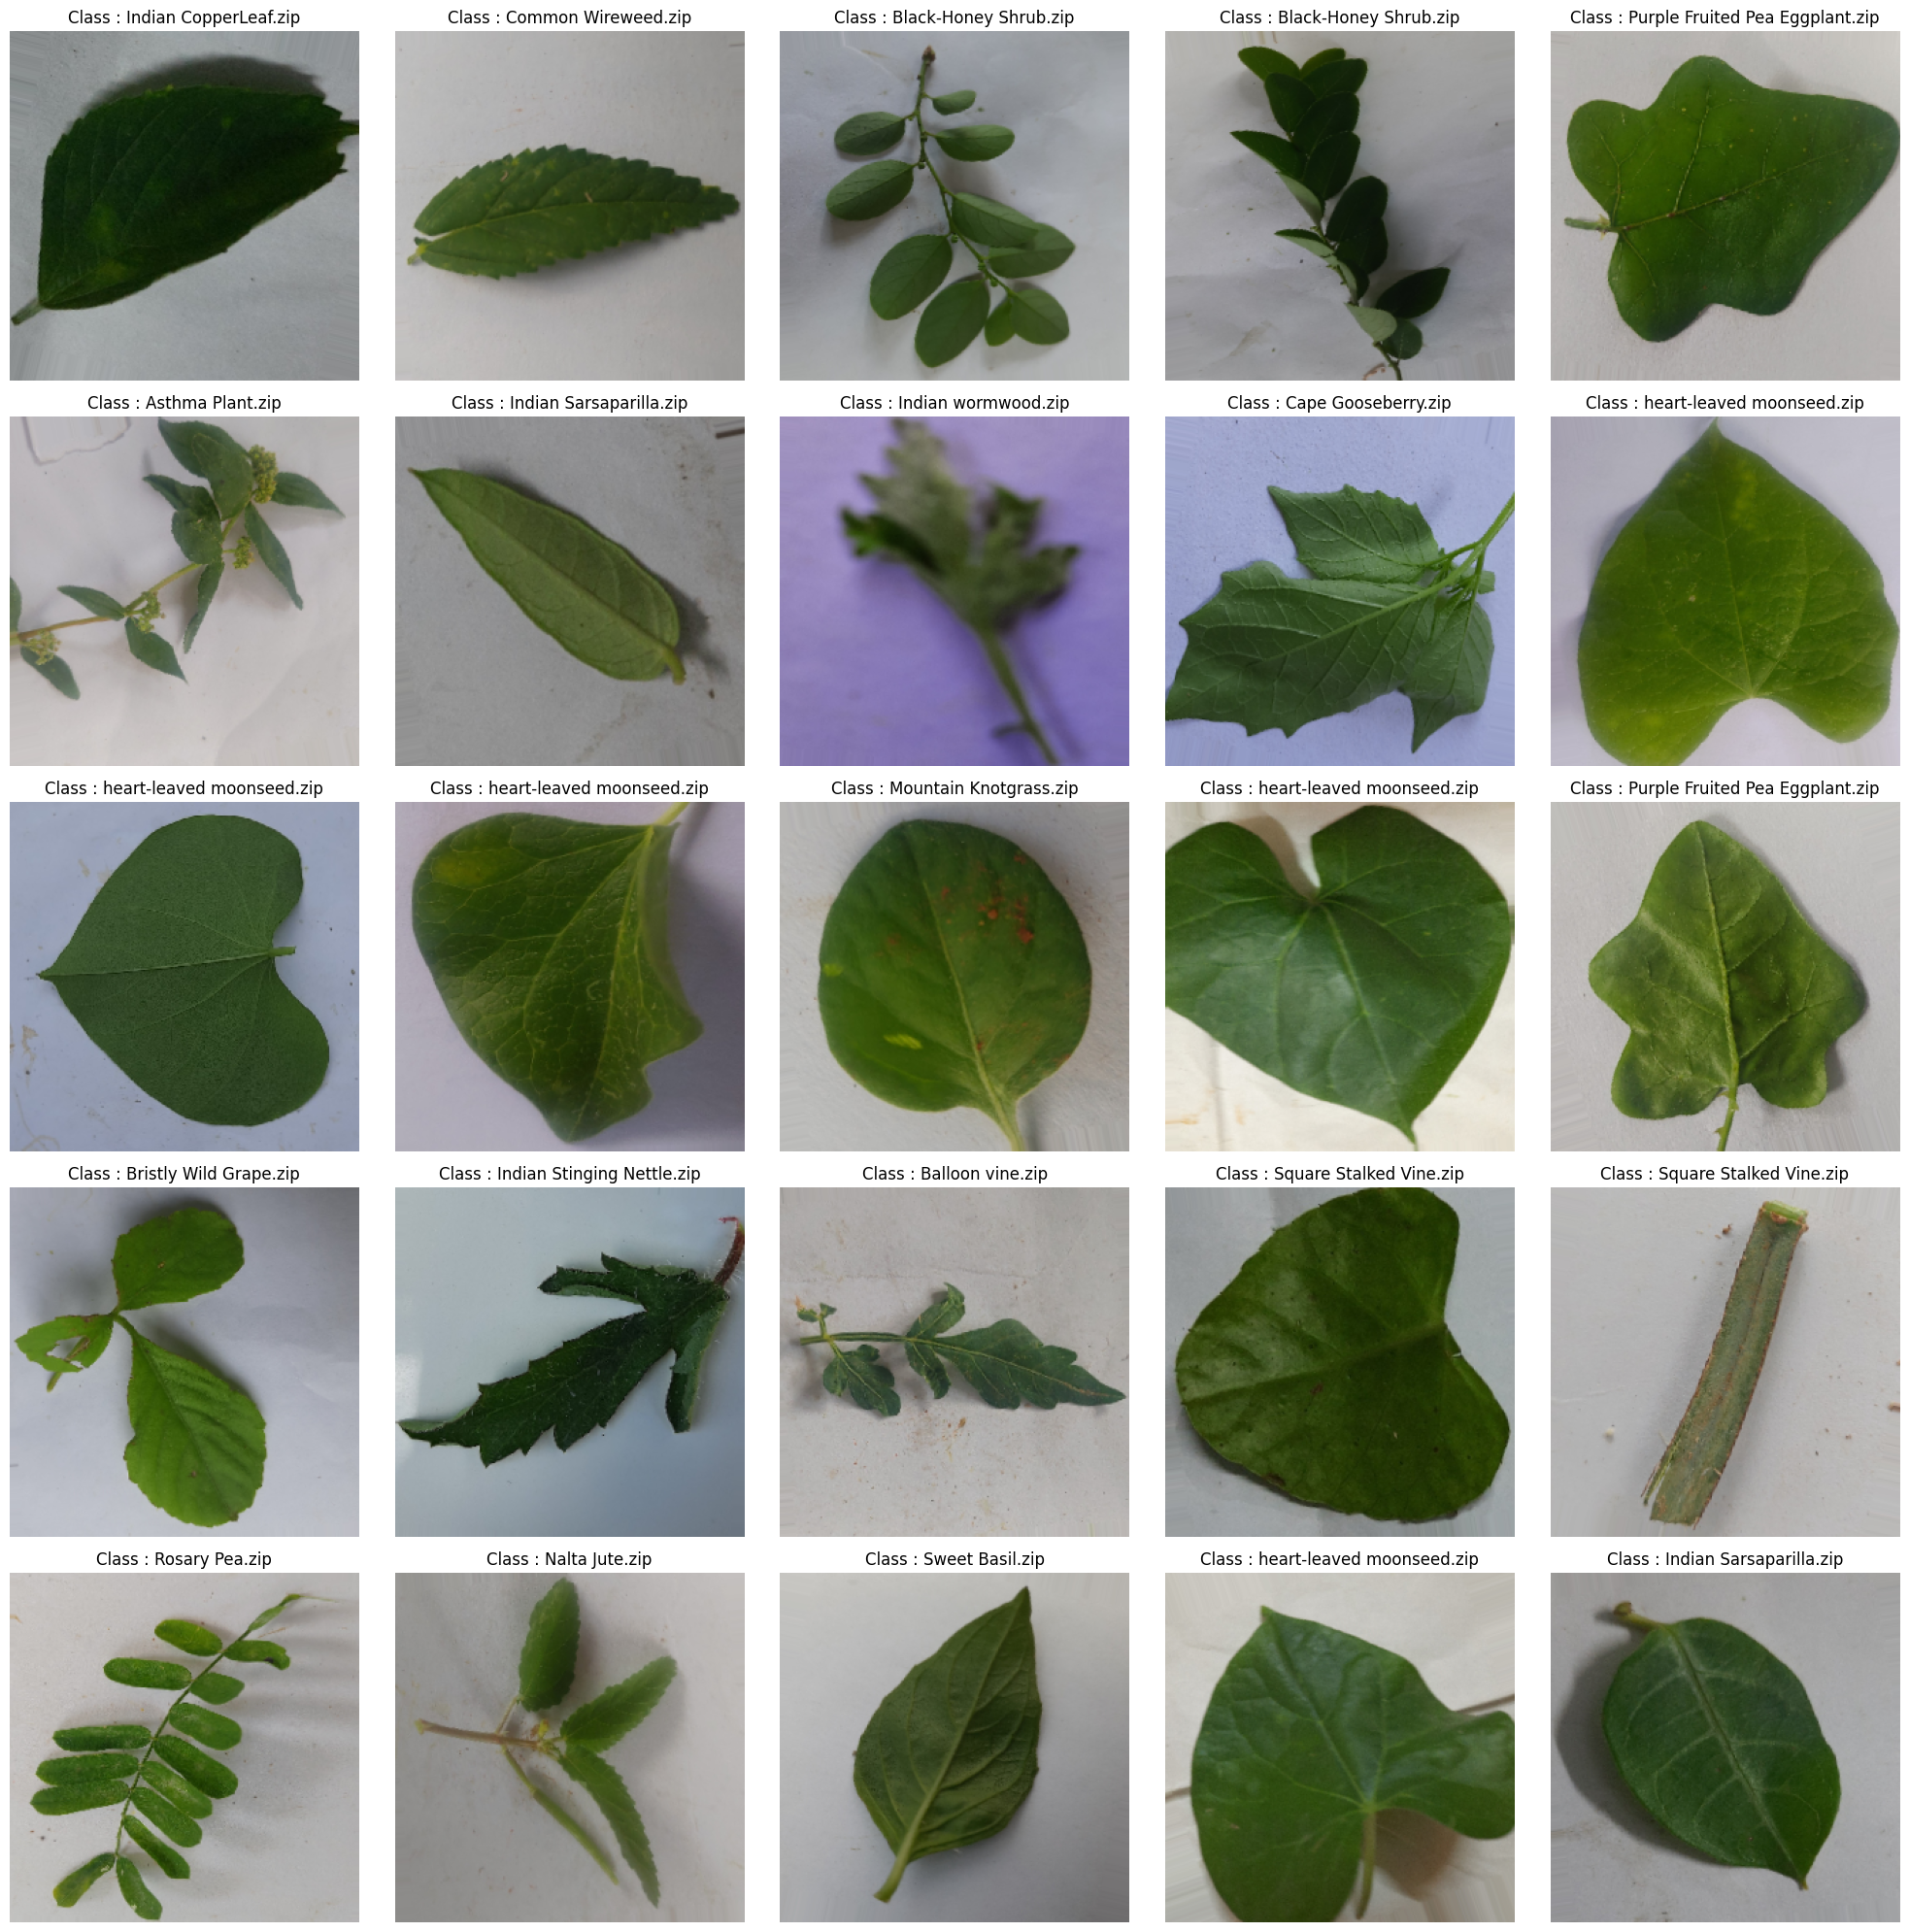

In [11]:

plt.figure(figsize=(20,20))
counter=1
for images, labels in iter(train_data):
    image, label = get_random_data([images, labels])
    plt.subplot(5,5,counter)
    show_image(image, image_title=f"Class : {class_names[int(label)]}")
    counter+=1
    if counter>=26: break
plt.tight_layout()
plt.show()


In [12]:

from tensorflow.keras.applications import Xception
from keras.layers import Dense, GlobalAvgPool2D as GAP, Dropout
name = "Xception"

base_model = Xception(include_top=False, input_shape=(256,256,3), weights='imagenet')
base_model.trainable = False 

xception = Sequential([
    base_model,
    GAP(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
], name=name)

xception.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

cbs = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint(name + ".h5", save_best_only=True)
]
xception.fit(
    train_data, validation_data=valid_data,
    epochs=20, callbacks=cbs
)


83683744/83683744 [==============================] - 3s 0us/step
Epoch 1/20
96/96 [==============================] - 91s 850ms/step - loss: 2.2375 - accuracy: 0.4476 - val_loss: 1.1689 - val_accuracy: 0.7038
Epoch 2/20
96/96 [==============================] - 79s 823ms/step - loss: 0.9560 - accuracy: 0.7392 - val_loss: 0.7327 - val_accuracy: 0.8125
Epoch 3/20
96/96 [==============================] - 81s 839ms/step - loss: 0.6167 - accuracy: 0.8382 - val_loss: 0.6000 - val_accuracy: 0.8465
Epoch 4/20
96/96 [==============================] - 79s 827ms/step - loss: 0.4730 - accuracy: 0.8747 - val_loss: 0.5354 - val_accuracy: 0.8601
Epoch 5/20
96/96 [==============================] - 80s 839ms/step - loss: 0.3932 - accuracy: 0.8915 - val_loss: 0.4861 - val_accuracy: 0.8736
Epoch 6/20
96/96 [==============================] - 79s 824ms/step - loss: 0.3274 - accuracy: 0.9099 - val_loss: 0.4389 - val_accuracy: 0.8995
Epoch 7/20
96/96 [==============================] - 79s 824ms/step - loss: 0.

In [13]:
model_file_path = '/kaggle/working/Xception.h5'
loaded_model = load_model(model_file_path)
loaded_model.summary()

Model: "Xception"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                12850     
                                                                 
Total params: 21,398,874
Trainable params: 537,394
Non-trainable params: 20,861,480
________________________________________

In [14]:
loaded_model.evaluate(valid_data)

23/23 [==============================] - 17s 682ms/step - loss: 0.3467 - accuracy: 0.9090


[0.3466777801513672, 0.9089673757553101]

1/1 [==============================] - 0s 29ms/step


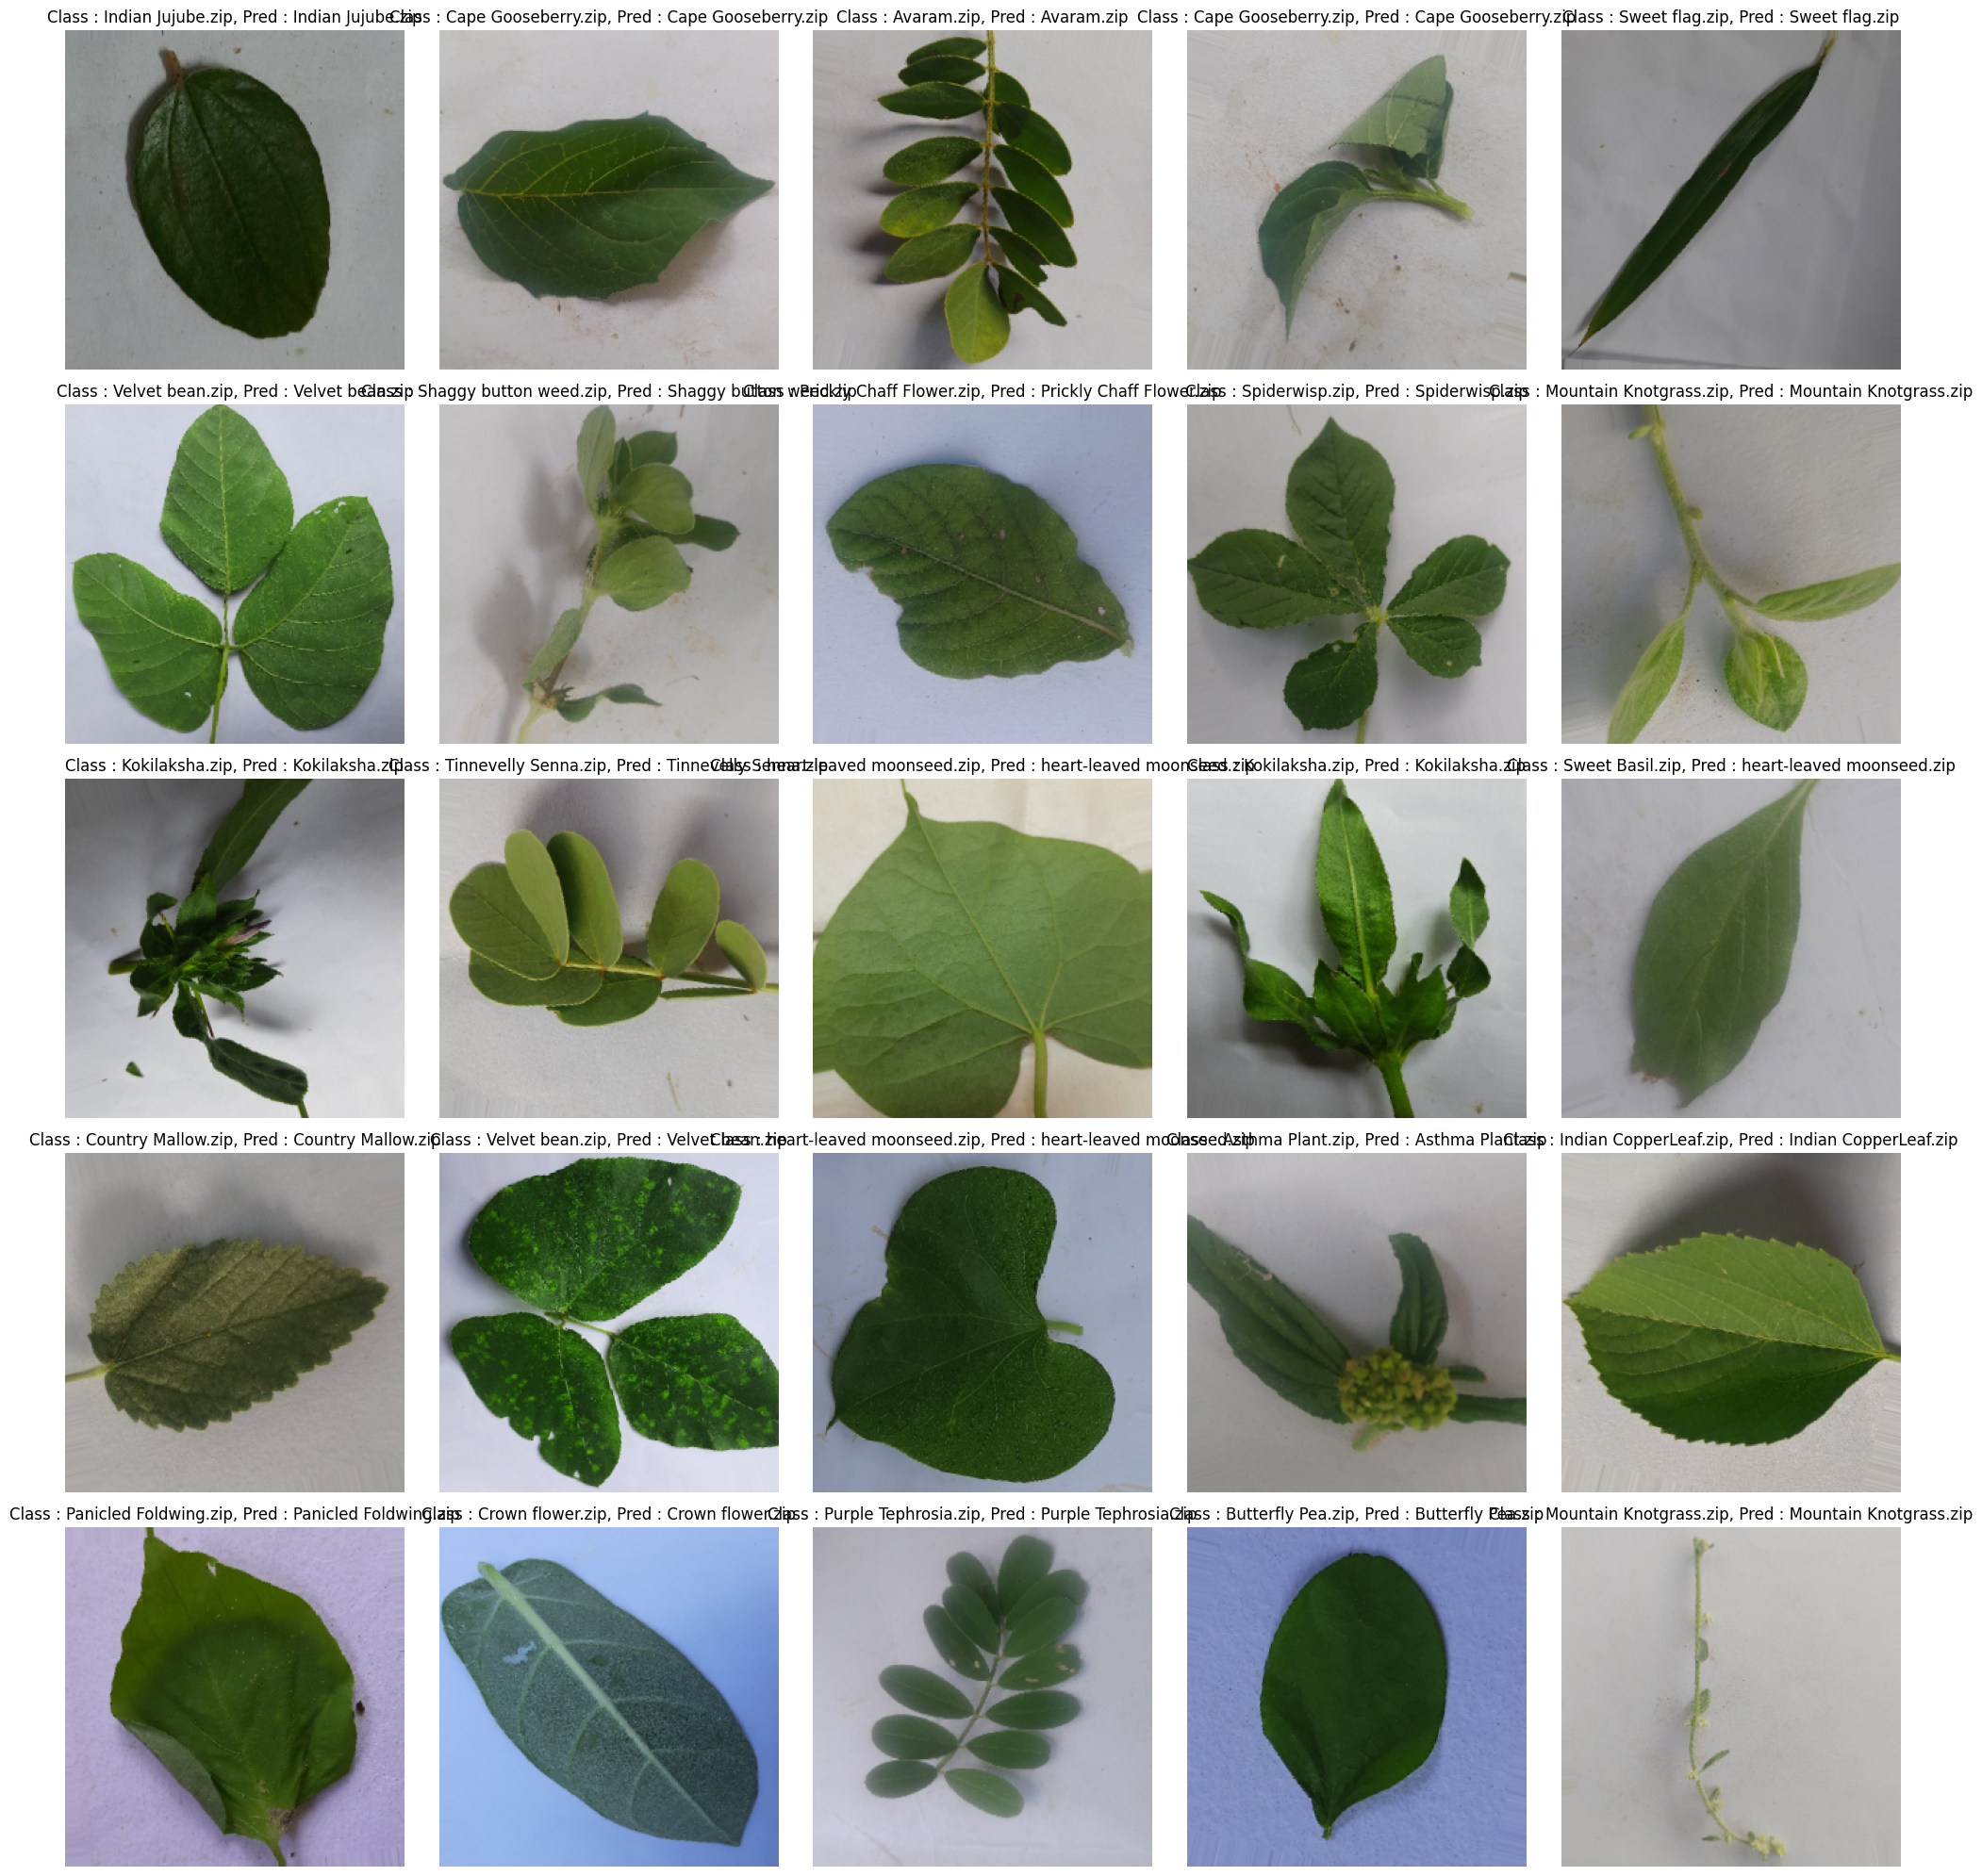

In [15]:
plt.figure(figsize=(20,20))
i=1
for images, labels in iter(valid_data):
    image, label = get_random_data([images, labels])
    pred_label = class_names[np.argmax(loaded_model.predict(image[np.newaxis,...]))]
    plt.subplot(5,5,i)
    show_image(image, image_title=f"Class : {class_names[int(label)]}, Pred : {pred_label}")
    i+=1
    if i>=26: break
plt.tight_layout()
plt.show()